# Data Exploration

In [57]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
fpath = 'data/311_2009.csv'
rawdf = pd.read_csv(fpath)

In [7]:
df.index

RangeIndex(start=0, stop=489607, step=1)

In [18]:
sample_ids = np.random.choice(rawdf.index,50000,replace=False)

In [42]:
df = rawdf.loc[sample_ids]

In [21]:
df.shape

(50000, 52)

In [22]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
489102,13448673,03/27/2009 12:00:00 AM,04/14/2009 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,CONSTRUCTION,ELEVATOR,RESIDENTIAL BUILDING,11233,120 CHAUNCEY STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.680399,-73.929417,"(40.6803990181202, -73.92941723335176)"
24488,12860067,01/06/2009 12:00:00 AM,02/21/2009 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,ELECTRIC,LIGHTING,RESIDENTIAL BUILDING,10462,1836 MATTHEWS AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.847298,-73.862113,"(40.84729811600354, -73.86211274900768)"
464820,13342727,03/10/2009 12:00:00 AM,03/12/2009 12:00:00 AM,DOT,Department of Transportation,Street Condition,Pothole,NaN,11213,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.675039,-73.930530,"(40.675039149900094, -73.93052967257964)"
385463,13077600,02/02/2009 12:00:00 AM,02/22/2009 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,NONCONST,SMOKE-DETECTOR,RESIDENTIAL BUILDING,10458,2691 MARION AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865424,-73.889871,"(40.86542378450216, -73.8898705669588)"
389710,13401613,03/18/2009 12:00:00 AM,03/19/2009 12:00:00 AM,DOT,Department of Transportation,Street Condition,Pothole,NaN,11435,143-31 HOOVER AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.714246,-73.814838,"(40.71424648747301, -73.81483750580222)"


# Explore Data by Day, Hour
SPOILER: no hourly data available

In [88]:
def str2day(value,fmt='%m/%d/%Y %I:%M:%S %p'):
    date = datetime.strptime(value,fmt)
    return date.day

In [89]:
def str2hour(value,fmt='%m/%d/%Y %I:%M:%S %p'):
    date = datetime.strptime(value,fmt)
    return date.hour

In [90]:
df['day'] = df['Created Date'].apply(str2date)

In [91]:
df['hour'] = df['Created Date'].apply(str2hour)

In [51]:
daily_counts = df.groupby('day').count()

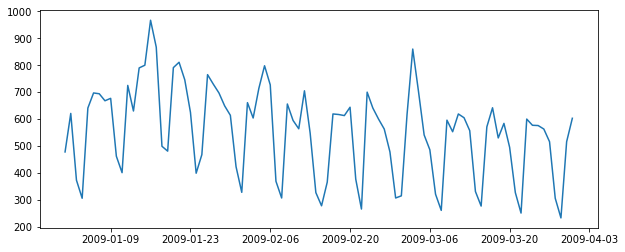

In [92]:
fig, ax = plt.subplots(1,figsize=(10,4))
ax.plot(daily_counts.index,daily_counts['Unique Key'])

In [ ]:
df[df['COMPLAINT TYPE']==]

In [ ]:
fig, ax = plt.subplots(1,figsize=(10,4))
ax.plot(daily_counts.index,daily_counts['Unique Key'])

In [ ]:
value = df.loc[489102,'Created Date']
date = datetime.strptime(value,'%m/%d/%Y %I:%M:%S %p')

# Unique Complaint Types

In [113]:
df['Complaint Type'].unique()

array(['CONSTRUCTION', 'ELECTRIC', 'Street Condition', 'NONCONST',
       'GENERAL CONSTRUCTION', 'Dirty Conditions', 'PAINT - PLASTER',
       'Street Light Condition', 'Blocked Driveway', 'HEATING',
       'Water System', 'Elevator', 'Air Quality', 'Food Establishment',
       'Public Payphone Complaint', 'Noise', 'APPLIANCE',
       'Noise - Commercial', 'PLUMBING', 'Derelict Vehicle',
       'Traffic Signal Condition', 'Taxi Complaint', 'Highway Condition',
       'Smoking', 'For Hire Vehicle Complaint', 'Derelict Vehicles',
       'Missed Collection (All Materials)', 'Broken Muni Meter',
       'Sidewalk Condition', 'General Construction/Plumbing',
       'Noise - Vehicle', 'Sanitation Condition',
       'Root/Sewer/Sidewalk Condition', 'Building/Use', 'Sewer', 'Rodent',
       'Snow', 'Special Projects Inspection Team (SPIT)', 'Plumbing',
       'Indoor Air Quality', 'Consumer Complaint',
       'Overgrown Tree/Branches', 'Investigations and Discipline (IAD)',
       'Water Conse

In [102]:
df[df['Complaint Type']=='Noise'].groupby('hour').count()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,day
hour,,,,,,,,,,,,,,,,,,,,,
0,757,757,743,757,757,757,757,0,733,558,...,0,0,0,0,0,0,733,733,733,757


In [117]:
df.loc[df['Complaint Type']=='HEATING','Latitude'].unique()

array([ 40.70397649,  40.86729   ,  40.64332451, ...,  40.81236414,
        40.65358519,  40.64692855])